# Webscraping Jobstreet

Name : Rusna Aida
Date : Feb 2023

Webscraping is data scraping used for extracting data from websites. Libraries that can be used to scrape the dataset are BeautifulSoup and Selenium. In this notebook, BeautifulSoup is choosed since we will not deal with Javascript web based.
Input the keyword and location and we are ready to scrape!

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

keyword='bbraun'
location='Penang'

In [2]:
records = []

keyword = keyword.replace(' ','-')
location = location.replace(' ','-')
template = 'https://www.jobstreet.com.my/en/job-search/{}-jobs-in-{}/'
url = template.format(keyword,location)

# generate Response
response = requests.get(url)
    
# Creating BeautifulSoup Object
soup = BeautifulSoup(response.text,'html.parser')
    
cards = soup.find_all('div','sx2jih0 zcydq876 zcydq866 zcydq896 zcydq886 zcydq8n zcydq856 zcydq8f6 zcydq8eu')

for card in cards: # it will go through every card from index 1
    job_name = card.find('span','sx2jih0').text
    anchor_tag = card.a
    job_url = 'https://www.jobstreet.com.my'+anchor_tag['href']
    #for job in jobs[:100]:
    items = card.find_all('span', attrs = {'class' : 'sx2jih0 iwjz4h1 zcydq84u zcydq80 zcydq8r'})
    if len(items) < 2:
        continue
    company_name = items[0].text.strip()
    job_location = items[1].text.strip()
    #company_name = card.find('span','sx2jih0 iwjz4h1 zcydq84u zcydq80 zcydq8r').text
    #job_location = card.find('a',class_='_6xa4xb0 sx2jih0 sx2jihf rqoqz4').text
    # fetching job summary
    try:
        summary = ''
        tag_text = ''
        job_summary = card.find('ul','sx2jih0 sx2jih3 _17fduda0 _17fduda5')
        #print(job_summary.text)
        for eachLI in job_summary('li'):
            tag_text = eachLI.text
            summary = summary + tag_text + ','
        if ',' in summary:
            summary = summary.rstrip(',')
        else:
            summary: 'Not Available'
    except AttributeError:
        summary = 'Not Available'
        
    # fetching job salary
    job_salary = card.find('span', 'sx2jih0 zcydq84u es8sxo0 es8sxo3 es8sxo21 es8sxoh')
    try:
        if len(job_salary)>=2:
            job_salary = job_salary[1]
            salary = job_salary.text
        else:
            salary = 'Not Available'
    except IndexError:
        salary = 'Not Available'
        
    # fetching job posted date
    time_tag = card.time
    post_date = time_tag.get('datetime')
    post_date = post_date.split('T')
    post_date = post_date[0]
    today = datetime.today().strftime('%Y-%m-%d')
    
    job_info=(job_name,job_url,company_name,job_location,
         summary,salary,post_date,today)
    
    records.append(job_info)
    
    # Here We Are Using Pandas Data Frame 
    # To Save All The Job Infomations
    # In CSV File
    
col = ['Job_Name','Job_URL','Company_Name','Job_Location',
        'Summary','Salary','Post_Date','Today_Date'] # save as column name
    
job_street_data = pd.DataFrame(records,columns=col) # convert the info the tabular 
#job_street_data.to_csv('C:/Users/User/Desktop/tableau projects/job_street_data.csv')
job_street_data.head()
    

,Job_Name,Job_URL,Company_Name,Job_Location,Summary,Salary,Post_Date,Today_Date
0,"Executive, Supply Chain Management",https://www.jobstreet.com.my/en/job/executive-...,B Braun Medical Supplies Sdn Bhd,Selangor,Join us and together we protect and improve th...,Not Available,2023-01-31,2023-02-02
1,Assistant Manager - Tax,https://www.jobstreet.com.my/en/job/assistant-...,B. Braun Medical Industries Sdn. Bhd.,Penang,Top 5 Workplaces for Career Growth in M'sia (L...,Not Available,2023-01-30,2023-02-02
2,Regional Process Manager – Treasury Shared Ser...,https://www.jobstreet.com.my/en/job/regional-p...,B. Braun Medical Industries Sdn. Bhd.,Penang,Protect and improve the health of people aroun...,Not Available,2023-01-31,2023-02-02
3,Lab Assistant (Pharma-Chemical Testing),https://www.jobstreet.com.my/en/job/lab-assist...,B. Braun Medical Industries Sdn. Bhd.,Penang,"Employer of choice,Opportunities for enhanced ...",Not Available,2023-01-26,2023-02-02
4,Staff Nurse/ Medical Assistant/ Post Basic Ren...,https://www.jobstreet.com.my/en/job/staff-nurs...,B. BRAUN AVITUM RENAL SERVICES SDN BHD,"Kuala Lumpur, Penang, Subang Jaya","Improving others' lives through your work,Attr...",Not Available,2023-01-29,2023-02-02


In [8]:
job_street_data['Job_Location'].value_counts()

Penang                                16
Bayan Lepas                            7
Selangor                               2
Shah Alam/Subang, Shah Alam/Subang     2
Petaling Jaya                          1
Kuala Lumpur, Penang, Subang Jaya      1
Name: Job_Location, dtype: int64

## Data Visualization with Packed Bubbles

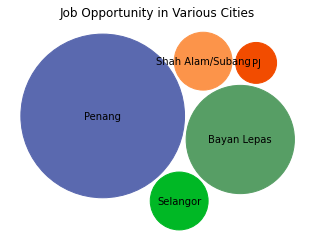

In [16]:
import numpy as np
import matplotlib.pyplot as plt

count_loc = {
    'loc': ['Penang', 'Bayan Lepas', 'Selangor', 'Shah Alam/Subang', 'PJ'],
    'num_count': [16, 7, 2, 2, 1],
    'color': ['#5A69AF', '#579E65', '#00B825', '#FC944A', '#F24C00']
}


class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=count_loc['num_count'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, count_loc['loc'], count_loc['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Job Opportunity in Various Cities')

plt.show()

B Braun Penang has the most job opportunities compared to other branches. The cell below shows the full name of the job's position.

## Full Name for the Job List

In [23]:
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 100
job_street_data['Job_Name']

0                                                          Executive, Supply Chain Management
1                                                                     Assistant Manager - Tax
2                                Regional Process Manager – Treasury Shared Service (Finance)
3                                                     Lab Assistant (Pharma-Chemical Testing)
4                                    Staff Nurse/ Medical Assistant/ Post Basic Renal Nurses.
5                                                        Engineer / Senior Engineer - Process
6                                                                                   Chargeman
7                            Label & Leaflet Design Shared Services (Open for Fresh Graduate)
8                                                 Senior Engineer - Verification & Validation
9                                                              Engineer/Sr Engineer - Project
10                                              Product Exec